<a href="https://colab.research.google.com/github/AzisilhamK463/MachineLearning2023/blob/main/UTS_Azis_Ilham_Kurniawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Azis Ilham Kurniawan**

**NIM: 2141720145**

**Kelas: TI-3F**

#**UTS**

Berdasarkan pemaparan kasus, Anda diminta untuk,

- Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. DOWNLOAD
- Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
- Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
- Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
  - Merubah color space
  - Reduksi dimensi
  - dsb

- Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Catatan :**

- Proses loading citra dicontohkan dengan menggunakan library openCV
- Secara default, openCV akan memuat citra dalam format BGR

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Plat Nomer 1**

In [17]:
img = cv2.imread('/content/drive/MyDrive/dummy/28.jpg')

In [19]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

359
1297
3


In [20]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(465623, 3)

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

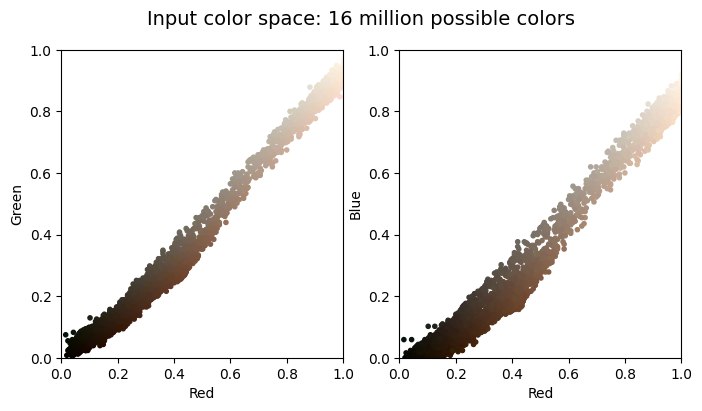

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [23]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

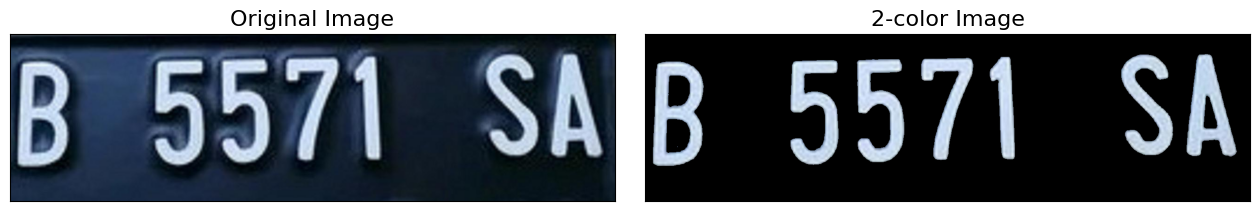

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

#**Plat Nomer 2**

In [50]:
img = cv2.imread('/content/drive/MyDrive/dummy/07.jpg')

In [51]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

120
264
3


In [52]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(31680, 3)

In [53]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

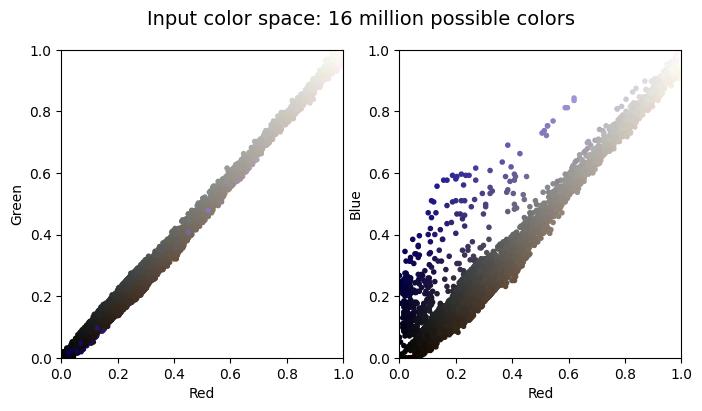

In [54]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [55]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

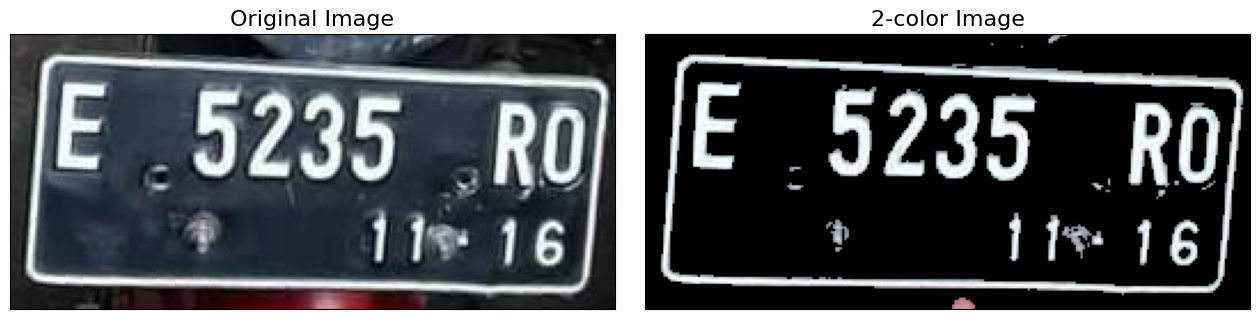

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

#**Plat Nomer 3**

In [41]:
img = cv2.imread('/content/drive/MyDrive/dummy/26.jpg')

In [42]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

343
1233
3


In [43]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(422919, 3)

In [44]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

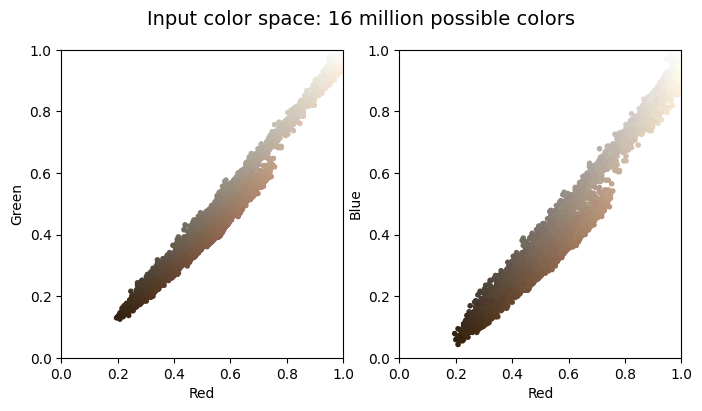

In [45]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [48]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

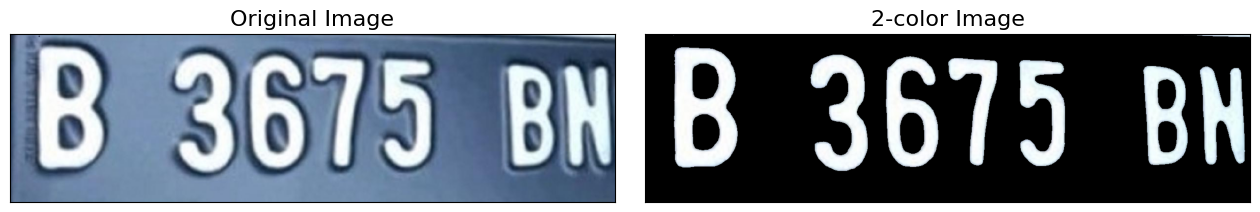

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

#**Plat Nomer 4**

In [59]:
img = cv2.imread('/content/drive/MyDrive/dummy/45.jpg')

In [60]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

258
1101
3


In [61]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [62]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

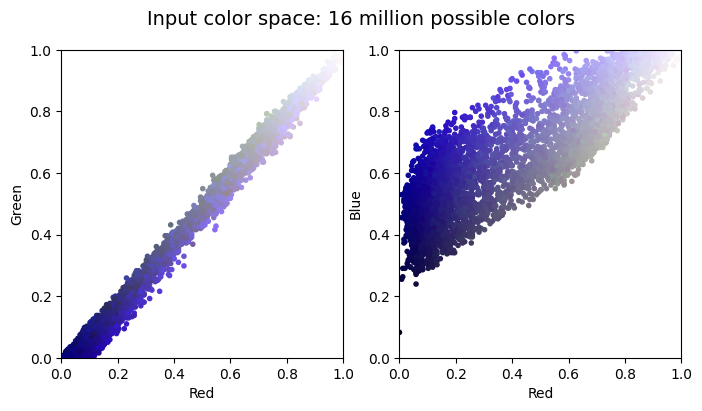

In [63]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [68]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 255]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

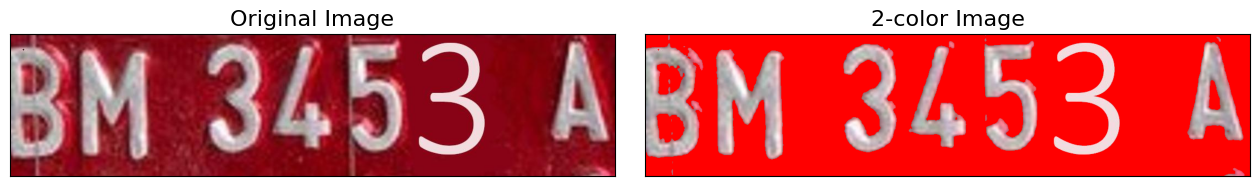

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

#**Plat Nomer 5**

In [70]:
img = cv2.imread('/content/drive/MyDrive/dummy/50.jpg')

In [71]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

299
1085
3


In [72]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(324415, 3)

In [73]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

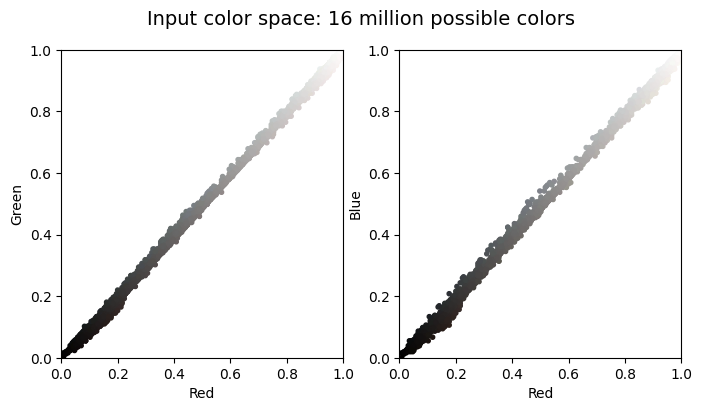

In [74]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [75]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]  # Ubah warna merah

# Citra yang telah di-segmentasi tersimpan dalam citra_segmentasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '2-color Image')

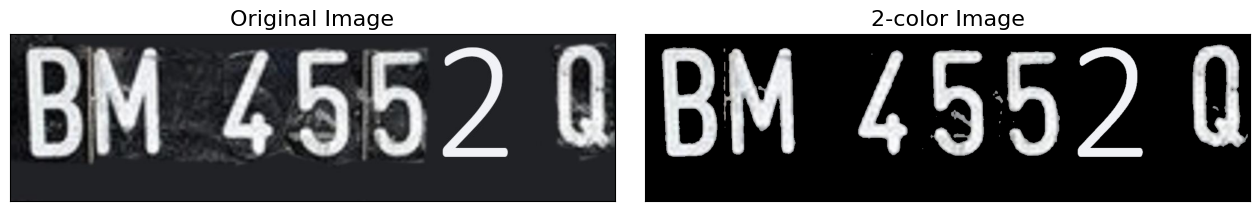

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)